In [61]:
##installing twitter api 
#!pip install tweepy

In [62]:
#Import libraies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import requests
import datetime
import re
%matplotlib inline
import tweepy
import os
import json
from timeit import default_timer as timer
from IPython.display import Image
import time

## Data Gathering

In this section, I will be gathering all the three pieces of data needed for this project using three different methods

- Twitter archive file: This I downloaded manually and import into the notebook
- The tweet image predictions: This I downloaded programmatically using the Request library.
- Tweets: Each tweet's retweet count and favorite ("like") count at minimum, and any additional data found to be interesting are scraped.



#### Twitter Archive file

In [63]:
##importing twitter archive file

df_twitterarchive = pd.read_csv("twitter-archive-enhanced.csv")


In [64]:
df_twitterarchive.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


#### Tweet Image Predition

In [65]:
url = "https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv"

response = requests.get(url)
with open('image_predictions.tsv', 'wb') as file:
            file.write(response.content)
            print('File saved successfully')

File saved successfully


In [66]:
##import this file
df_imageprediction = pd.read_csv("image_predictions.tsv", sep= '\t')
df_imageprediction.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


#### Using tweety to get tweet from twitter 

In [67]:
## extract tweetids from df_twitterarchive
tweet_ids = list(df_twitterarchive.tweet_id)

file_name = 'tweet_ids.txt'
with open(file_name, 'w') as f:
  for id in tweet_ids:
    f.write(f'{str(id)}\n')

##downloading tweets using API
print(r'Error: Kindly provide the consumer_key, consumer_screet, access_token, '
      'access_screet and bearer_token')

from tweepy import OAuthHandler
import json
from timeit import default_timer as timer

# Query Twitter API for each tweet in the Twitter archive and save JSON in a text file
# These are hidden to comply with Twitter's API terms and conditions
consumer_key = "**********"
consumer_secret = "***************"
access_token = "*******************"
access_secret = "**************"
bearer_token = "******************"

auth = OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth, wait_on_rate_limit=True)

# Same result as the cell above but data not saved here
tweet_ids = df_twitterarchive.tweet_id.values
len(tweet_ids)

# Query Twitter's API for JSON data for each tweet ID in the Twitter archive
count = 0
fails_dict = {}
start = timer()
# Save each tweet's returned JSON as a new line in a .txt file
with open('tweet_json.txt', 'w') as outfile:
    # This loop will likely take 20-30 minutes to run because of Twitter's rate limit
    for tweet_id in tweet_ids:
        count += 1
        print(str(count) + ": " + str(tweet_id))
        try:
            tweet = api.get_status(tweet_id, tweet_mode='extended')
            print("Success")
            json.dump(tweet._json, outfile)
            outfile.write('\n')
        except tweepy.TweepError as e:
            print("Fail")
            fails_dict[tweet_id] = e
            pass
end = timer()
print(end - start)
print(fails_dict)


#### Lets read in the json file

In [68]:
tweets = []
for line in open('tweet-json.txt', 'r'):
    tweets.append(json.loads(line))

In [69]:
# Select columns to be used for the analysis
id = []
favorite_count = []
retweet_count = []
created_at = []
for value in tweets:
  id.append(value['id'])
  favorite_count.append(value['favorite_count'])
  retweet_count.append(value['retweet_count'])
  date = time.strftime('%Y-%m-%d %H:%M:%S', time.strptime(value['created_at'],'%a %b %d %H:%M:%S +0000 %Y'))
  created_at.append(date)


dict = {
    'Created_at' : created_at,
    'tweet_id' : id,
    'favorite_count' : favorite_count,
    'retweet_count' : retweet_count,
    }

df_tweet = pd.DataFrame(dict)

In [70]:
df_tweet.head()

,Created_at,tweet_id,favorite_count,retweet_count
0,2017-08-01 16:23:56,892420643555336193,39467,8853
1,2017-08-01 00:17:27,892177421306343426,33819,6514
2,2017-07-31 00:18:03,891815181378084864,25461,4328
3,2017-07-30 15:58:51,891689557279858688,42908,8964
4,2017-07-29 16:00:24,891327558926688256,41048,9774


## Assessing Data

In this section, detect and document at least eight (8) quality issues and two (2) tidiness issue. You must use both visual assessment programmatic assessement to assess the data.

Note: pay attention to the following key points when you access the data.

- You only want original ratings (no retweets) that have images. Though there are 5000+ tweets in the dataset, not all are dog ratings and some are retweets.
- Assessing and cleaning the entire dataset completely would require a lot of time, and is not necessary to practice and demonstrate your skills in data wrangling. Therefore, the requirements of this project are only to assess and clean at least 8 quality issues and at least 2 tidiness issues in this dataset.
- The fact that the rating numerators are greater than the denominators does not need to be cleaned. This unique rating system is a big part of the popularity of WeRateDogs.
- You do not need to gather the tweets beyond August 1st, 2017. You can, but note that you won't be able to gather the image predictions for these tweets since you don't have access to the algorithm used.

#### Basic assessments

In [71]:
df_twitterarchive.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


In [72]:
df_imageprediction.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [73]:
df_tweet.head()

,Created_at,tweet_id,favorite_count,retweet_count
0,2017-08-01 16:23:56,892420643555336193,39467,8853
1,2017-08-01 00:17:27,892177421306343426,33819,6514
2,2017-07-31 00:18:03,891815181378084864,25461,4328
3,2017-07-30 15:58:51,891689557279858688,42908,8964
4,2017-07-29 16:00:24,891327558926688256,41048,9774


In [74]:
##info
df_twitterarchive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

In [75]:
df_imageprediction.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [76]:
df_tweet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Created_at      2354 non-null   object
 1   tweet_id        2354 non-null   int64 
 2   favorite_count  2354 non-null   int64 
 3   retweet_count   2354 non-null   int64 
dtypes: int64(3), object(1)
memory usage: 73.7+ KB


In [77]:
## getting all duplicated rows
dup_columns = pd.Series(list(df_twitterarchive) + list(df_imageprediction) + list(df_tweet))
dup_columns[dup_columns.duplicated()]

dup_columns.count()

33

In [78]:
## getting all the nulls for each three dataframe
df_twitterarchive.isnull().sum().sum()

11140

In [79]:
df_imageprediction.isnull().sum().sum()

0

In [80]:
df_tweet.isnull().sum().sum()

0

In [81]:
## checking the stats describe for the three datasets

df_twitterarchive.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


In [82]:
df_imageprediction.describe()

,tweet_id,img_num,p1_conf,p2_conf,p3_conf
count,2.075000e+03,2075.000000,2075.000000,2.075000e+03,2.075000e+03
mean,7.384514e+17,1.203855,0.594548,1.345886e-01,6.032417e-02
std,6.785203e+16,0.561875,0.271174,1.006657e-01,5.090593e-02
min,6.660209e+17,1.000000,0.044333,1.011300e-08,1.740170e-10
25%,6.764835e+17,1.000000,0.364412,5.388625e-02,1.622240e-02
50%,7.119988e+17,1.000000,0.588230,1.181810e-01,4.944380e-02
75%,7.932034e+17,1.000000,0.843855,1.955655e-01,9.180755e-02
max,8.924206e+17,4.000000,1.000000,4.880140e-01,2.734190e-01


In [83]:
df_tweet.describe()

,tweet_id,favorite_count,retweet_count
count,2.354000e+03,2354.000000,2354.000000
mean,7.426978e+17,8080.968564,3164.797366
std,6.852812e+16,11814.771334,5284.770364
min,6.660209e+17,0.000000,0.000000
25%,6.783975e+17,1415.000000,624.500000
50%,7.194596e+17,3603.500000,1473.500000
75%,7.993058e+17,10122.250000,3652.000000
max,8.924206e+17,132810.000000,79515.000000


In [84]:
## checcking individual columns in each dataset

## df_twitterarchive
df_twitterarchive.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


In [85]:
df_twitterarchive.sample(5)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
1245,711732680602345472,NaN,NaN,2016-03-21 01:54:29 +0000,"<a href=""http://twitter.com/download/iphone"" r...",I want to hear the joke this dog was just told...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/711732680...,10,10,None,None,None,None,None
460,817777686764523521,NaN,NaN,2017-01-07 16:59:28 +0000,"<a href=""http://twitter.com/download/iphone"" r...","This is Dido. She's playing the lead role in ""...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/817777686...,13,10,Dido,doggo,None,pupper,None
1589,686683045143953408,NaN,NaN,2016-01-11 22:56:10 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Mona. She's a Yarborough Splishnsplash...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/686683045...,11,10,Mona,None,None,pupper,None
2034,671743150407421952,NaN,NaN,2015-12-01 17:30:22 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a Tuscaloosa Alcatraz named Jacob (Yac...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/671743150...,11,10,a,None,None,None,None
579,800513324630806528,NaN,NaN,2016-11-21 01:37:04 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Chef. Chef loves everyone and wants ev...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/800513324...,11,10,Chef,None,None,None,None


In [86]:
df_twitterarchive['in_reply_to_status_id'].unique()

array([           nan, 8.86266357e+17, 8.81607037e+17, 8.79553827e+17,
       8.70726203e+17, 8.63425646e+17, 6.67152164e+17, 8.57156678e+17,
       8.55818117e+17, 8.56286004e+17, 8.55861584e+17, 8.55858536e+17,
       8.50328819e+17, 8.48212112e+17, 8.47606176e+17, 7.59099524e+17,
       8.40698300e+17, 8.38145499e+17, 8.38085539e+17, 8.35245984e+17,
       8.32087548e+17, 8.31903044e+17, 8.26598365e+17, 8.23326389e+17,
       8.21152593e+17, 8.13127252e+17, 8.11627233e+17, 7.33109485e+17,
       8.01854331e+17, 8.00857954e+17, 7.97123751e+17, 7.72743019e+17,
       7.66711819e+17, 7.63865175e+17, 7.50180499e+17, 7.47648654e+17,
       7.46885919e+17, 6.91416866e+17, 7.38411920e+17, 7.29113531e+17,
       7.07980066e+17, 7.03255936e+17, 7.04485745e+17, 7.03041950e+17,
       6.96488711e+17, 6.75349384e+17, 6.70668383e+17, 6.93642232e+17,
       6.93572216e+17, 6.92417313e+17, 6.92041935e+17, 6.90341254e+17,
       6.86034025e+17, 6.85547936e+17, 6.84959799e+17, 6.84481075e+17,
      

In [87]:
df_twitterarchive['in_reply_to_user_id'].unique()

array([           nan, 2.28118160e+09, 4.73844300e+07, 3.10544075e+09,
       1.64877600e+07, 7.75962000e+07, 4.19698384e+09, 1.80670967e+08,
       2.79280991e+08, 1.94351775e+08, 1.36157220e+07, 2.19550580e+07,
       8.40547864e+17, 2.89413118e+09, 2.62595760e+07, 3.05820820e+07,
       2.06837240e+07, 1.58285381e+09, 1.13211856e+08, 1.18563420e+07,
       2.91859009e+08, 2.91663050e+07, 7.30505014e+17, 1.58464070e+07,
       4.71729748e+09, 3.58972768e+08, 2.31910820e+09, 2.87854860e+07,
       1.19898851e+09, 4.67036706e+08, 1.63746780e+07, 2.14356580e+07])

In [88]:
df_twitterarchive.tweet_id.duplicated().sum()

0

In [89]:
df_twitterarchive.doggo.value_counts()

None     2259
doggo      97
Name: doggo, dtype: int64

In [90]:
df_twitterarchive.doggo.duplicated().sum()

2354

In [91]:
df_twitterarchive.pupper.value_counts()

None      2099
pupper     257
Name: pupper, dtype: int64

In [92]:
df_twitterarchive.pupper.duplicated().sum()

2354

In [93]:
df_twitterarchive.source[0]

'<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>'

## Data Quality Issues

In [94]:
### df_imageprediction table
df_imageprediction.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [95]:
df_imageprediction.sample(5)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
1534,790277117346975746,https://pbs.twimg.com/media/Cveg1-NXgAASaaT.jpg,1,Labrador_retriever,0.427742,True,Great_Dane,0.190503,True,curly-coated_retriever,0.146427,True
1096,720059472081784833,https://pbs.twimg.com/media/Cf4qRcmWEAA9V4h.jpg,1,Mexican_hairless,0.451852,True,redbone,0.254884,True,Italian_greyhound,0.094818,True
218,670073503555706880,https://pbs.twimg.com/media/CUyUSuWXIAAZKYF.jpg,1,malamute,0.601886,True,Siberian_husky,0.340106,True,Eskimo_dog,0.050041,True
1991,873580283840344065,https://pbs.twimg.com/media/DB-UotKXkAEHXVi.jpg,1,Newfoundland,0.678537,True,Tibetan_mastiff,0.244022,True,chow,0.048530,True
1686,814638523311648768,https://pbs.twimg.com/media/C04taUjWIAA6Mo4.jpg,2,golden_retriever,0.650814,True,kuvasz,0.053281,True,cocker_spaniel,0.035440,True


In [96]:
df_imageprediction.p1_dog.unique()

array([ True, False])

In [97]:
df_imageprediction.p2_dog.unique()

array([ True, False])

In [98]:
df_imageprediction.p3_dog.unique()

array([ True, False])

In [99]:
## df_tweet

df_tweet.sample(5)

,Created_at,tweet_id,favorite_count,retweet_count
1927,2015-12-08 01:47:22,674042553264685056,772,142
843,2016-08-18 23:55:18,766423258543644672,6671,1825
129,2017-05-23 17:40:04,867072653475098625,0,135
722,2016-10-03 15:42:44,782969140009107456,26949,8521
592,2016-11-16 16:28:21,798925684722855936,8246,1663


#### Quality

- Some tweets contains retweets and therefore duplicates
- Some tweets are replies and therefore duplicate

##### Twitter Archive Table

- There are lots of missing data in the columns
- Some datatypes are not correct and needs changing e.g timestamp column
- The missing values are represented by None
- Tweet_id in archive table duplicated in image and tweet tables
- Remove html tags from the source column in the archive table

##### Image Prediction Table

- Text columns are not properly formatted
- Sometimes Lowercase is used for P1, P2, and P3
- P1, P2, and P3 should be formatted properly in the image table

##### Tweets Table

- Date should be Extracted from the Created_at column
- Rename the Created_at column as Timestamp to bridge uniformity

#### Tidyness

- doggo, floofer, pupper, and puppo are categorical variable, and can be combined into one column.

- the 'text' column has more than one information in a single column (tweet and URL)

- Merge the 3 tables together



## Cleaning Data

Clean all of the issues you documented while assessing. Perform this cleaning in the "Cleaning Data" section

**Note**: Make a copy of the original data before cleaning. Cleaning includes merging individual pieces of data according to the rules of tidy data. The result should be a high-quality and tidy master pandas DataFrame (or DataFrames, if appropriate).

In [100]:
## making copies

df_twitterarchive_clean = df_twitterarchive.copy()

df_imageprediction_clean = df_imageprediction.copy()

df_tweet_clean = df_tweet.copy()

#### Issue 1: Some tweets contains retweets and therefore duplicates
**Define:** Delete rows that have retweets 'retweeted_status_id

#### Code

In [101]:
df_twitterarchive_clean = df_twitterarchive_clean[np.isnan(df_twitterarchive_clean.retweeted_status_id)]

#### Test

In [102]:
df_twitterarchive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2175 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2175 non-null   object 
 4   source                      2175 non-null   object 
 5   text                        2175 non-null   object 
 6   retweeted_status_id         0 non-null      float64
 7   retweeted_status_user_id    0 non-null      float64
 8   retweeted_status_timestamp  0 non-null      object 
 9   expanded_urls               2117 non-null   object 
 10  rating_numerator            2175 non-null   int64  
 11  rating_denominator          2175 non-null   int64  
 12  name                        2175 non-null   object 
 13  doggo                       2175 

#### Issue 2: Some tweets are replies and therefore duplicate

**Define:** Drop any tweet with 'in_reply_status_id'

#### Code

In [103]:
df_twitterarchive_clean = df_twitterarchive_clean[np.isnan(df_twitterarchive_clean.in_reply_to_status_id)]

#### Test

In [104]:
df_twitterarchive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2097 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2097 non-null   int64  
 1   in_reply_to_status_id       0 non-null      float64
 2   in_reply_to_user_id         0 non-null      float64
 3   timestamp                   2097 non-null   object 
 4   source                      2097 non-null   object 
 5   text                        2097 non-null   object 
 6   retweeted_status_id         0 non-null      float64
 7   retweeted_status_user_id    0 non-null      float64
 8   retweeted_status_timestamp  0 non-null      object 
 9   expanded_urls               2094 non-null   object 
 10  rating_numerator            2097 non-null   int64  
 11  rating_denominator          2097 non-null   int64  
 12  name                        2097 non-null   object 
 13  doggo                       2097 

#### Issue 3: Missing Data / Unneeded columns

**Define:** in the twitter archive column, in_reply_to_status_id, in_reply_to_user_id,retweeted_status_id, retweeted_status_user_id, retweeted_status_timestamp are meaningless and dropped

##### Code

In [105]:
df_twitterarchive_clean.drop(columns=['in_reply_to_status_id', 'in_reply_to_user_id','retweeted_status_id', 'retweeted_status_user_id',
       'retweeted_status_timestamp'], inplace=True)


#### Test

In [106]:
df_twitterarchive_clean.head()

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


#### Issue 4: Data Type

#### **Define**
**Twitter Archive Table**

- change timestamp to datetime
- tweet_id in twitterarchive table to a string not integer

**Image Prediction Table**

- change tweet_id in imageprediction table to a string not integer

**Tweets Table**

- Change Created_at to datetime in tweets table
- change twwet_id to string in tweet table

#### Code

In [107]:
### change timestamp to datetime in twitterarchive table
df_twitterarchive_clean['timestamp'] = pd.to_datetime(df_twitterarchive_clean['timestamp'])

In [108]:
### change tweet_id in twitterarchive table to a string not integer

df_twitterarchive_clean['tweet_id'] = df_twitterarchive_clean['tweet_id'].astype(str)

In [109]:
### change tweet_id in imageprediction table to a string not integer
df_imageprediction_clean['tweet_id'] = df_imageprediction_clean['tweet_id'].astype(str)

In [110]:
### change P2_dog to boolean in imageprediction table

df_imageprediction_clean['p2_dog'] = df_imageprediction_clean['p2_dog'].astype(bool)

In [111]:
### Change Created_at to datetime in tweets table
df_tweet_clean['Created_at'] = pd.to_datetime(df_tweet_clean['Created_at'])

In [112]:
## change twwet_id to string in tweet table

df_tweet_clean['tweet_id'] = df_tweet_clean['tweet_id'].astype(str)

#### Test

In [113]:
### lets check the datatypes we have now

df_tweet_clean.dtypes

Created_at        datetime64[ns]
tweet_id                  object
favorite_count             int64
retweet_count              int64
dtype: object

In [114]:
df_twitterarchive_clean.dtypes

tweet_id                           object
timestamp             datetime64[ns, UTC]
source                             object
text                               object
expanded_urls                      object
rating_numerator                    int64
rating_denominator                  int64
name                               object
doggo                              object
floofer                            object
pupper                             object
puppo                              object
dtype: object

In [115]:
df_imageprediction_clean.dtypes

tweet_id     object
jpg_url      object
img_num       int64
p1           object
p1_conf     float64
p1_dog         bool
p2           object
p2_conf     float64
p2_dog         bool
p3           object
p3_conf     float64
p3_dog         bool
dtype: object

#### Issues 5: Column names

#### **Define**

- Change the created_at to timestamp in tweet table

In [116]:
df_imageprediction_clean.columns

Index(['tweet_id', 'jpg_url', 'img_num', 'p1', 'p1_conf', 'p1_dog', 'p2',
       'p2_conf', 'p2_dog', 'p3', 'p3_conf', 'p3_dog'],
      dtype='object')

In [117]:
df_twitterarchive_clean.columns

Index(['tweet_id', 'timestamp', 'source', 'text', 'expanded_urls',
       'rating_numerator', 'rating_denominator', 'name', 'doggo', 'floofer',
       'pupper', 'puppo'],
      dtype='object')

In [118]:
df_tweet_clean.columns

Index(['Created_at', 'tweet_id', 'favorite_count', 'retweet_count'], dtype='object')

#### Code

In [119]:
## lets change created_at to timestamp

df_tweet_clean.rename(columns= {"Created_at": "timestamp"}, inplace = True)

#### Test

In [120]:
df_tweet_clean.columns

Index(['timestamp', 'tweet_id', 'favorite_count', 'retweet_count'], dtype='object')

#### Issues 6: Timestamp and Source in Twitter Archive & Tweets Table

#### **Define**

- I will remove html tags from the source column
- Timestamp will contain year, month and day only
- Choose only the expanded url url that follows the normal pattern

#### Code

In [121]:
df_twitterarchive_clean['source']  = df_twitterarchive_clean.source.str.extract('(http://\w+\.com/\w+/iphone)', expand = True)
df_twitterarchive_clean['expanded_urls']  = df_twitterarchive_clean.expanded_urls.str.extract('(https://\w+\.com/\w+/\w+/\d+/\w+/\d)', expand = True)

In [122]:
df_twitterarchive_clean['timestamp'] = df_twitterarchive_clean['timestamp'].astype(str)
df_tweet_clean['timestamp'] = df_tweet_clean['timestamp'].astype(str)
df_twitterarchive_clean['timestamp'] = df_twitterarchive_clean['timestamp'].str.extract('(\d{4}[-]\d{2}[-]\d{2})', expand = True)
df_tweet_clean['timestamp'] = df_tweet_clean['timestamp'].str.extract('(\d{4}[-]\d{2}[-]\d{2})', expand = True)
df_twitterarchive_clean['timestamp'] = pd.to_datetime(df_twitterarchive_clean['timestamp'])
df_tweet_clean['timestamp'] = pd.to_datetime(df_tweet_clean['timestamp'])

#### Test

In [123]:
df_twitterarchive_clean.head()

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,2017-08-01,http://twitter.com/download/iphone,This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,2017-08-01,http://twitter.com/download/iphone,This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,2017-07-31,http://twitter.com/download/iphone,This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,2017-07-30,http://twitter.com/download/iphone,This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,2017-07-29,http://twitter.com/download/iphone,This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


In [124]:
df_tweet_clean.head()

,timestamp,tweet_id,favorite_count,retweet_count
0,2017-08-01,892420643555336193,39467,8853
1,2017-08-01,892177421306343426,33819,6514
2,2017-07-31,891815181378084864,25461,4328
3,2017-07-30,891689557279858688,42908,8964
4,2017-07-29,891327558926688256,41048,9774


#### Issues 7: Image P1, P2, P3 inconsistencies

#### **Define**
- Replace "-" with space (" ") for p1, p2, and p3 in the image table

In [125]:
df_imageprediction_clean.p1 = df_imageprediction_clean.p1.str.replace("_", ",")
df_imageprediction_clean.p2 = df_imageprediction_clean.p2.str.replace("_", ",")
df_imageprediction_clean.p3 = df_imageprediction_clean.p3.str.replace("_", ",")

#### Test

In [126]:
df_imageprediction_clean.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,"Welsh,springer,spaniel",0.465074,True,collie,0.156665,True,"Shetland,sheepdog",0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,"miniature,pinscher",0.074192,True,"Rhodesian,ridgeback",0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,"German,shepherd",0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,"Rhodesian,ridgeback",0.408143,True,redbone,0.360687,True,"miniature,pinscher",0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,"miniature,pinscher",0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


#### Issue 8: Invalid names

**Define:** Replace inaccurate dog names with an empty string

#### Code

In [127]:
inaccurate_names = []

for i in df_twitterarchive_clean.name:
    # Will check every name start with lowercase.
    if i.islower():
        # If yes will append to inaccurate_names.
        inaccurate_names.append(i)

# The list will filter only unique values
inaccurate_names = list(set(inaccurate_names))

# Printing inaccurate names
inaccurate_names

['mad',
 'by',
 'infuriating',
 'not',
 'getting',
 'one',
 'a',
 'all',
 'just',
 'his',
 'the',
 'an',
 'my',
 'officially',
 'very',
 'quite',
 'incredibly',
 'space',
 'old',
 'unacceptable',
 'life',
 'light',
 'actually',
 'such',
 'this']

In [128]:
### replacing the names
for i in inaccurate_names:
    df_twitterarchive_clean.name.replace(i, " ", inplace = True)

#### Test

In [129]:
sum(df_twitterarchive_clean.name.isin(inaccurate_names))

0

#### Issue 9: Standardizing Dog ratings

**Define:** Convert numerator and denominator datatypes to float, remove non expected value of denominator and numerator anything different of 10

#### Code

In [130]:
# Converting the rating_numerator and rating_denominator to float.
df_twitterarchive_clean.rating_numerator = df_twitterarchive_clean.rating_numerator.astype(float)
df_twitterarchive_clean.rating_denominator = df_twitterarchive_clean.rating_denominator.astype(float)

In [131]:
def func(twitter_archive_clean):
    if twitter_archive_clean['rating_numerator'] > 10:
        return 10
    return twitter_archive_clean['rating_numerator']

In [132]:
df_twitterarchive_clean["rating_numerator"] = df_twitterarchive_clean.apply(lambda x :func(x), axis = 1)

In [133]:
def func(twitter_archive_clean):
    if twitter_archive_clean['rating_denominator'] > 10:
        return 10
    return twitter_archive_clean['rating_denominator']

In [134]:
df_twitterarchive_clean["rating_denominator"] = df_twitterarchive_clean.apply(lambda x :func(x), axis = 1)

#### Test

In [135]:
df_twitterarchive_clean["rating_numerator"]

0       10.0
1       10.0
2       10.0
3       10.0
4       10.0
        ... 
2351     5.0
2352     6.0
2353     9.0
2354     7.0
2355     8.0
Name: rating_numerator, Length: 2097, dtype: float64

In [136]:
df_twitterarchive_clean["rating_denominator"]

0       10.0
1       10.0
2       10.0
3       10.0
4       10.0
        ... 
2351    10.0
2352    10.0
2353    10.0
2354    10.0
2355    10.0
Name: rating_denominator, Length: 2097, dtype: float64

#### Tidyness Issue: 

**Define** doggo, floofer, pupper, and puppo are categorical variable, and can be combined into one column.

#### Code

In [137]:
# Subset the twt_ach_mstr just to pick the "dogtionary columns".
stage_cols = df_twitterarchive_clean[['doggo','floofer','pupper','puppo']]

# Replace all "None" values to " ".
stage_cols = stage_cols.replace('None', '') 

# Adding the columns to create a new one.
dogtionary = np.array(stage_cols['doggo']) + np.array(stage_cols['floofer']) + np.array(stage_cols['pupper']) + np.array(stage_cols['puppo'])

# Printing
pd.DataFrame(dogtionary, columns = ['dogtionary']).dogtionary.value_counts()

                1761
pupper           221
doggo             72
puppo             23
floofer            9
doggopupper        9
doggopuppo         1
doggofloofer       1
Name: dogtionary, dtype: int64

In [138]:
# Fixing the dogs with two classifications.
dogtionary[dogtionary == 'doggopupper'] = 'multiclass'
dogtionary[dogtionary == 'doggofloofer'] = 'multiclass'
dogtionary[dogtionary == 'doggopuppo'] = 'multiclass'

# Printing to see the results.
pd.DataFrame(dogtionary, columns = ['dogtionary']).dogtionary.value_counts()

              1761
pupper         221
doggo           72
puppo           23
multiclass      11
floofer          9
Name: dogtionary, dtype: int64

In [139]:
# Reseting the index of twitter_archive_clean.
df_twitterarchive_clean.reset_index(drop=True, inplace=True)

# Appending dogtionary to twt_ach_mstr.
df_twitterarchive_clean = pd.concat([df_twitterarchive_clean, pd.DataFrame(dogtionary, columns = ['dogtionary'])], axis = 1)

In [140]:
#dropping the columns doggo, floofer, pupper, puppo
list2_col = ['doggo', 'floofer', 'pupper', 'puppo']
df_twitterarchive_clean.drop(list2_col, axis = 1 , inplace = True)

#### Test

In [141]:
df_twitterarchive_clean.columns

Index(['tweet_id', 'timestamp', 'source', 'text', 'expanded_urls',
       'rating_numerator', 'rating_denominator', 'name', 'dogtionary'],
      dtype='object')

In [142]:
df_twitterarchive_clean.head()

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,dogtionary
0,892420643555336193,2017-08-01,http://twitter.com/download/iphone,This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,10.0,10.0,Phineas,
1,892177421306343426,2017-08-01,http://twitter.com/download/iphone,This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,10.0,10.0,Tilly,
2,891815181378084864,2017-07-31,http://twitter.com/download/iphone,This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,10.0,10.0,Archie,
3,891689557279858688,2017-07-30,http://twitter.com/download/iphone,This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,10.0,10.0,Darla,
4,891327558926688256,2017-07-29,http://twitter.com/download/iphone,This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,10.0,10.0,Franklin,


## Merging the clean datasets

In [143]:
twitter_archive_master = pd.merge(pd.merge(df_twitterarchive_clean, df_imageprediction_clean, on = "tweet_id"), df_tweet_clean, on = "tweet_id")

In [144]:
twitter_archive_master.head()

,tweet_id,timestamp_x,source,text,expanded_urls,rating_numerator,rating_denominator,name,dogtionary,jpg_url,...,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,timestamp_y,favorite_count,retweet_count
0,892420643555336193,2017-08-01,http://twitter.com/download/iphone,This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,10.0,10.0,Phineas,,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,...,False,bagel,0.085851,False,banana,0.076110,False,2017-08-01,39467,8853
1,892177421306343426,2017-08-01,http://twitter.com/download/iphone,This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,10.0,10.0,Tilly,,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,...,True,Pekinese,0.090647,True,papillon,0.068957,True,2017-08-01,33819,6514
2,891815181378084864,2017-07-31,http://twitter.com/download/iphone,This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,10.0,10.0,Archie,,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,...,True,malamute,0.078253,True,kelpie,0.031379,True,2017-07-31,25461,4328
3,891689557279858688,2017-07-30,http://twitter.com/download/iphone,This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,10.0,10.0,Darla,,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,...,False,"Labrador,retriever",0.168086,True,spatula,0.040836,False,2017-07-30,42908,8964
4,891327558926688256,2017-07-29,http://twitter.com/download/iphone,This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,10.0,10.0,Franklin,,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,...,True,"English,springer",0.225770,True,"German,short-haired,pointer",0.175219,True,2017-07-29,41048,9774


In [145]:
## lets drop timestamp_y and remove _x

twitter_archive_master.drop(columns = ['timestamp_y'], inplace= True)
twitter_archive_master.rename(columns = {'timestamp_x':'timestamp'}, inplace = True)
twitter_archive_master.head()

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,dogtionary,jpg_url,...,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,favorite_count,retweet_count
0,892420643555336193,2017-08-01,http://twitter.com/download/iphone,This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,10.0,10.0,Phineas,,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,...,0.097049,False,bagel,0.085851,False,banana,0.076110,False,39467,8853
1,892177421306343426,2017-08-01,http://twitter.com/download/iphone,This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,10.0,10.0,Tilly,,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,...,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True,33819,6514
2,891815181378084864,2017-07-31,http://twitter.com/download/iphone,This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,10.0,10.0,Archie,,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,...,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True,25461,4328
3,891689557279858688,2017-07-30,http://twitter.com/download/iphone,This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,10.0,10.0,Darla,,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,...,0.170278,False,"Labrador,retriever",0.168086,True,spatula,0.040836,False,42908,8964
4,891327558926688256,2017-07-29,http://twitter.com/download/iphone,This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,10.0,10.0,Franklin,,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,...,0.555712,True,"English,springer",0.225770,True,"German,short-haired,pointer",0.175219,True,41048,9774


In [146]:
## creating day and month column

twitter_archive_master['month'] = twitter_archive_master.timestamp.dt.month_name()
twitter_archive_master['day'] = twitter_archive_master.timestamp.dt.day_name()

In [147]:
twitter_archive_master.head()

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,dogtionary,jpg_url,...,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,favorite_count,retweet_count,month,day
0,892420643555336193,2017-08-01,http://twitter.com/download/iphone,This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,10.0,10.0,Phineas,,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,...,bagel,0.085851,False,banana,0.076110,False,39467,8853,August,Tuesday
1,892177421306343426,2017-08-01,http://twitter.com/download/iphone,This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,10.0,10.0,Tilly,,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,...,Pekinese,0.090647,True,papillon,0.068957,True,33819,6514,August,Tuesday
2,891815181378084864,2017-07-31,http://twitter.com/download/iphone,This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,10.0,10.0,Archie,,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,...,malamute,0.078253,True,kelpie,0.031379,True,25461,4328,July,Monday
3,891689557279858688,2017-07-30,http://twitter.com/download/iphone,This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,10.0,10.0,Darla,,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,...,"Labrador,retriever",0.168086,True,spatula,0.040836,False,42908,8964,July,Sunday
4,891327558926688256,2017-07-29,http://twitter.com/download/iphone,This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,10.0,10.0,Franklin,,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,...,"English,springer",0.225770,True,"German,short-haired,pointer",0.175219,True,41048,9774,July,Saturday


In [148]:
## exporting as csv
twitter_archive_master.to_csv("twitter_archive_master.csv", index = False)

## Analysis and Visualization

#### Question 1: Ten top months with the highest favorite_count

In [149]:
df_analyse = twitter_archive_master.copy()

In [150]:
top = df_analyse.sort_values(by = 'favorite_count', ascending = False)
top_10 = top[['tweet_id', 'source', 'favorite_count', 'month']].head(10)
top_10

,tweet_id,source,favorite_count,month
306,822872901745569793,http://twitter.com/download/iphone,132810,January
769,744234799360020481,http://twitter.com/download/iphone,131075,June
58,879415818425184262,http://twitter.com/download/iphone,107956,June
397,807106840509214720,http://twitter.com/download/iphone,107015,December
108,866450705531457537,http://twitter.com/download/iphone,106827,May
330,819004803107983360,http://twitter.com/download/iphone,95450,January
93,870374049280663552,http://twitter.com/download/iphone,85011,June
399,806629075125202948,http://twitter.com/download/iphone,75639,December
134,859196978902773760,http://twitter.com/download/iphone,75193,May
804,739238157791694849,http://twitter.com/download/iphone,75163,June


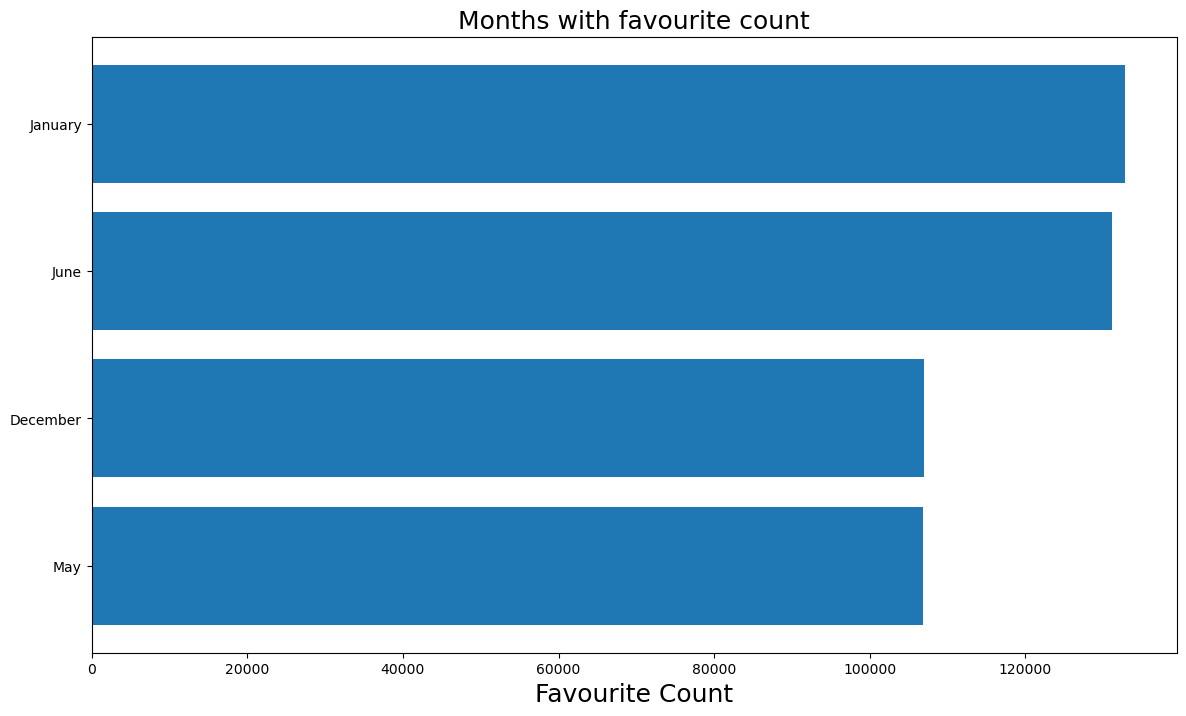

In [151]:
## visualize

plt.figure(figsize=  (14, 8))
plt.barh(top_10.month, top_10.favorite_count, align = 'center')
plt.gca().invert_yaxis()
plt.xlabel("Favourite Count", fontsize = 18)
plt.title("Months with favourite count", fontsize = 18)
plt.show();

#### Question 2: What are the top 10 most popular dog names?

In [152]:
df_analyse['name'].value_counts()[2:12]

Charlie    11
Lucy       10
Cooper     10
Oliver     10
Tucker      9
Penny       9
Winston     8
Sadie       8
Daisy       7
Lola        7
Name: name, dtype: int64

<AxesSubplot:>

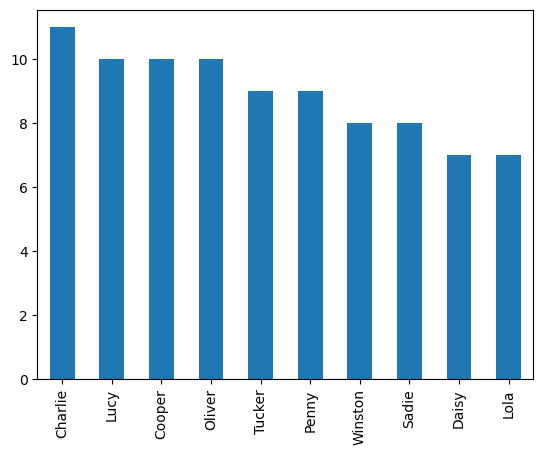

In [153]:
## Visualize

df_analyse['name'].value_counts()[2:12].plot(kind="bar")

#### Question 3: What are the Ten top months with the highest Retweetcount

In [154]:
top_retweet = df_analyse.sort_values(by = 'retweet_count', ascending = False)
top_retweet = top_retweet[['tweet_id', 'source', 'text', 'retweet_count', 'month']].head(10)
top_retweet.head()

,tweet_id,source,text,retweet_count,month
769,744234799360020481,http://twitter.com/download/iphone,Here's a doggo realizing you can stand in a po...,79515,June
397,807106840509214720,http://twitter.com/download/iphone,This is Stephan. He just wants to help. 13/10 ...,56625,December
804,739238157791694849,http://twitter.com/download/iphone,Here's a doggo blowing bubbles. It's downright...,52360,June
306,822872901745569793,http://twitter.com/download/iphone,Here's a super supportive puppo participating ...,48265,January
58,879415818425184262,http://twitter.com/download/iphone,This is Duddles. He did an attempt. 13/10 some...,45849,June


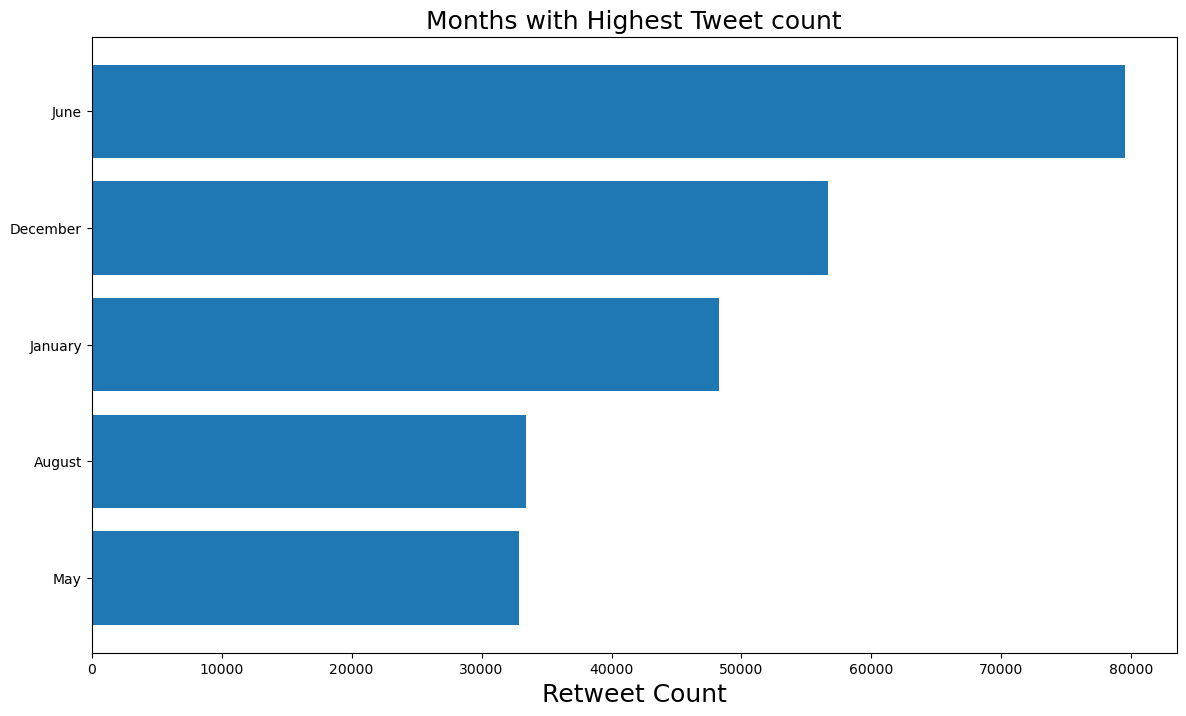

In [155]:
plt.figure(figsize=  (14, 8))
plt.barh(top_retweet.month, top_retweet.retweet_count, align = 'center')
plt.gca().invert_yaxis()
plt.xlabel("Retweet Count", fontsize = 18)
plt.title("Months with Highest Tweet count", fontsize = 18)
plt.show();

#### Question 4: Correlation between Favourite and Retweet Counts

In [156]:
df_analyse.favorite_count.corr(df_analyse.retweet_count)

0.9130143486107436

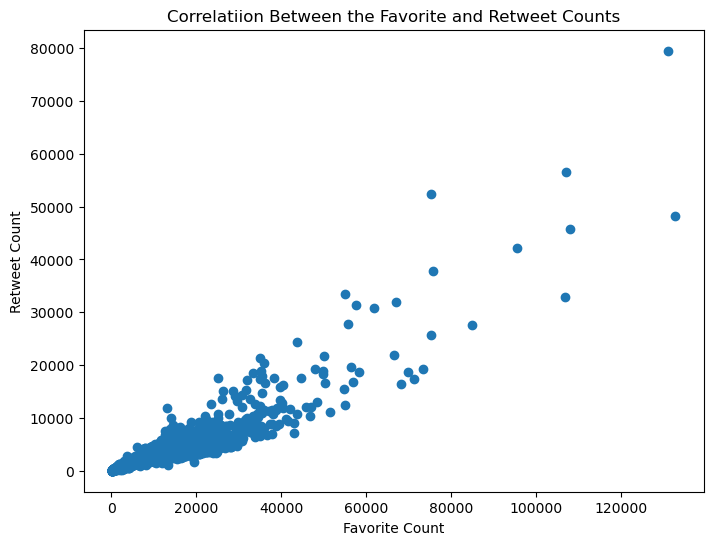

In [157]:
##visualize
plt.figure(figsize=(8, 6))
ax = plt.axes()
ax.scatter(df_analyse.favorite_count, df_analyse.retweet_count)

ax.set_xlabel('Favorite Count')
ax.set_ylabel('Retweet Count')
ax.set_title('Correlatiion Between the Favorite and Retweet Counts')

ax.axis('tight')

plt.show()

#### Question 5 : What day of the week do people tweet mostly about dogs?

In [158]:
df_analyse['day'].value_counts()

Monday       326
Wednesday    293
Tuesday      291
Thursday     280
Friday       279
Sunday       254
Saturday     248
Name: day, dtype: int64

<AxesSubplot:>

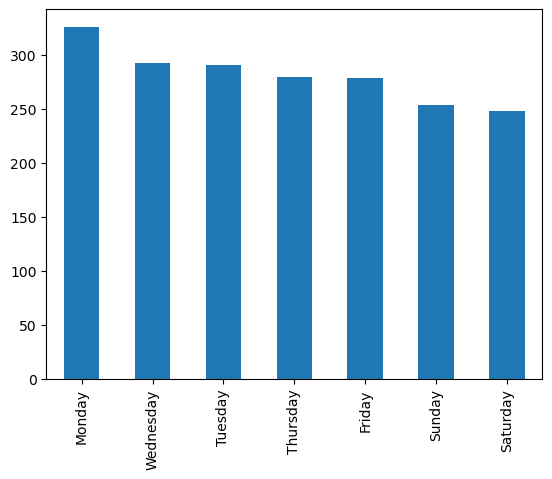

In [159]:
df_analyse['day'].value_counts().plot(kind="bar")